In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/vgames2.csv', index_col =0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
test = df[df.Name == 'FIFA 14' ]
test = test.sort_values(by=["Year"])
test

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
457,FIFA 14,XOne,2013.0,Sports,Electronic Arts,0.41,0.66,0,0.12
2724,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73
2821,FIFA 14,3DS,2013.0,Sports,Electronic Arts,0,0.23,0,0.03
3151,FIFA 14,Wii,2013.0,Sports,Electronic Arts,0,0.38,0,0.05
5332,FIFA 14,PSV,2013.0,Sports,Electronic Arts,0.11,0.25,0.01,0.13
5501,FIFA 14,PC,2013.0,Sports,Electronic Arts,0.01,0.36,0,60K
7866,FIFA 14,X360,2013.0,Sports,Electronic Arts,0.92,2.93M,0.01,0.46
10209,FIFA 14,PSP,2013.0,Sports,Electronic Arts,0,0.16,0,0.07
10454,FIFA 14,PS4,2013.0,Sports,Electronic Arts,0.61,1.85,0.11,0.33


In [ ]:
df['Name'].value_counts()

Need for Speed: Most Wanted            12
FIFA 14                                 9
Ratatouille                             9
Madden NFL 07                           9
LEGO Marvel Super Heroes                9
                                       ..
Saki: Achiga-Hen Portable               1
Shining Force Feather                   1
Model * Oshare Audition: Dream Girl     1
Twisted Metal 2                         1
Rainbow Islands: Revolution             1
Name: Name, Length: 11493, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
# 원본 데이터에서 중복된 값이 어떤건지 확인

df_display = display(df[df.duplicated()])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [ ]:
# 원본 데이터 복사해놓고 중복데이터 삭제

df_copy = df.copy()
df_copy.drop_duplicates(inplace=True)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  object 
 6   EU_Sales     16597 non-null  object 
 7   JP_Sales     16597 non-null  object 
 8   Other_Sales  16597 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df_copy.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# sales 컬럼 살펴보고 자주 보이는 문자열 검색
df['NA_Sales'].sample(15)

13461    0.36
722         0
6050     0.01
6533     0.78
6826        0
10534    0.14
5714        0
1092     0.05
14976    0.09
4165     0.13
1373        0
14651     0.5
4602     3.64
12843       0
2190     0.03
Name: NA_Sales, dtype: object

In [ ]:
'''
문자열 'M'과 'K'이 포함된 NA_Sales 컬럼 검색한뒤 다른 sales 컬럼도 살펴본뒤 문자열만 삭제하려고 했으나 
후에 이상치 검색할때 이상치들 숫자들 뒤에 'K','M'이 붙는 것을 확인. 도메인 검색으로도 뜻하는 바를 알수 없고 그 개수도 전체 데이터수에 비해 얼마 없다고 판단해 모두 삭제처리함 
'''

df_copy = df_copy[~df_copy['NA_Sales'].str.contains("K|M")]
df_copy = df_copy[~df_copy['EU_Sales'].str.contains("K|M")]
df_copy = df_copy[~df_copy['JP_Sales'].str.contains("K|M")]
df_copy = df_copy[~df_copy['Other_Sales'].str.contains("K|M")]

In [ ]:
# 잘 지워졌는지 확인

a=df_copy.query('NA_Sales.str.contains("K|M")', engine = 'python')
b=df_copy.query('EU_Sales.str.contains("K|M")', engine = 'python')
c=df_copy.query('JP_Sales.str.contains("K|M")', engine = 'python')
d=df_copy.query('Other_Sales.str.contains("K|M")', engine = 'python')

len(a)+len(b)+len(c)+len(d)


0

In [ ]:
sales_columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
df_copy[sales_columns] = df_copy[sales_columns].apply(pd.to_numeric, errors = 'coerce')

df_copy[sales_columns].fillna(0, inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15812 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15812 non-null  object 
 1   Platform     15812 non-null  object 
 2   Year         15559 non-null  float64
 3   Genre        15764 non-null  object 
 4   Publisher    15755 non-null  object 
 5   NA_Sales     15812 non-null  float64
 6   EU_Sales     15812 non-null  float64
 7   JP_Sales     15812 non-null  float64
 8   Other_Sales  15812 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
# year, genre, publisher 결측치 삭제

df_clean = df_copy.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15476 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15476 non-null  object 
 1   Platform     15476 non-null  object 
 2   Year         15476 non-null  float64
 3   Genre        15476 non-null  object 
 4   Publisher    15476 non-null  object 
 5   NA_Sales     15476 non-null  float64
 6   EU_Sales     15476 non-null  float64
 7   JP_Sales     15476 non-null  float64
 8   Other_Sales  15476 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [ ]:
# year 컬럼의 날짜 수정

def year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

df_clean['Year'] = df_clean['Year'].apply(year)
df_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
 df_clean['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2003, 2006, 2014, 2015, 2002,
       1997, 2013, 1996, 2004, 2000, 1984, 1998, 2001, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980])

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15476 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15476 non-null  object 
 1   Platform     15476 non-null  object 
 2   Year         15476 non-null  int64  
 3   Genre        15476 non-null  object 
 4   Publisher    15476 non-null  object 
 5   NA_Sales     15476 non-null  float64
 6   EU_Sales     15476 non-null  float64
 7   JP_Sales     15476 non-null  float64
 8   Other_Sales  15476 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df_clean.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,15476.000000,15476.000000,15476.000000,15476.000000,15476.000000
mean,2006.403851,0.263680,0.146372,0.077810,0.048344
std,5.834873,0.824188,0.510354,0.309821,0.192612
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2017.000000,41.490000,29.020000,10.220000,10.570000


1. 지역에 따라서 선호하는 게임 장르가 다른가?

In [ ]:
area_genre = df_clean.groupby('Genre')[sales_columns].sum()
area_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,804.68,487.72,150.70,176.49
Adventure,97.75,60.99,49.28,16.12
Fighting,210.75,94.36,82.95,34.38
Misc,380.80,200.61,99.94,70.07
Platform,413.88,185.34,123.19,48.18
Puzzle,118.97,50.03,56.21,12.18
Racing,335.27,223.48,51.50,73.76
Role-Playing,295.54,166.88,320.83,52.88
Shooter,546.92,294.28,37.19,97.07


In [ ]:
# 지역별 출고량 합계

na = area_genre['NA_Sales'].sum()
eu = area_genre['EU_Sales'].sum()
jp = area_genre['JP_Sales'].sum()
other = area_genre['Other_Sales'].sum()

In [ ]:
# 장르별 지역에서의 비율

na_arge = ((area_genre['NA_Sales']/na)*100).round(2)
eu_arge = ((area_genre['EU_Sales']/eu)*100).round(2)
jp_arge = ((area_genre['JP_Sales']/jp)*100).round(2)
other_arge = ((area_genre['Other_Sales']/other)*100).round(2)
eu_arge

Genre
Action          21.53
Adventure        2.69
Fighting         4.17
Misc             8.86
Platform         8.18
Puzzle           2.21
Racing           9.87
Role-Playing     7.37
Shooter         12.99
Simulation       4.74
Sports          15.50
Strategy         1.91
Name: EU_Sales, dtype: float64

In [ ]:
na_arge.sort_values(ascending=False)

Genre
Action          19.72
Sports          15.60
Shooter         13.40
Platform        10.14
Misc             9.33
Racing           8.22
Role-Playing     7.24
Fighting         5.16
Simulation       4.26
Puzzle           2.92
Adventure        2.40
Strategy         1.61
Name: NA_Sales, dtype: float64

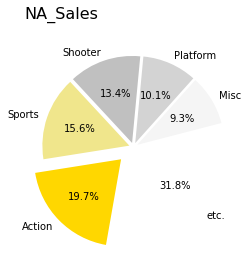

In [ ]:
ratio = [19.72, 15.60, 13.40, 10.14, 9.33, 31.81]
labels = ['Action', 'Sports', 'Shooter','Platform','Misc','etc.']
explode = [0.2,0.05,0.05,0.05,0.05,0.05]
colors = ['gold','khaki','silver','lightgray','whitesmoke','white']

plt.pie(ratio, labels=labels, explode=explode, colors=colors, autopct='%.1f%%', startangle=260, counterclock=False)

title_font = {
    'fontsize': 16, 
}

plt.title('NA_Sales', fontdict=title_font, loc='left', pad = 20)
plt.show()

In [ ]:
eu_arge.sort_values(ascending=False)

Genre
Action          21.53
Sports          15.50
Shooter         12.99
Racing           9.87
Misc             8.86
Platform         8.18
Role-Playing     7.37
Simulation       4.74
Fighting         4.17
Adventure        2.69
Puzzle           2.21
Strategy         1.91
Name: EU_Sales, dtype: float64

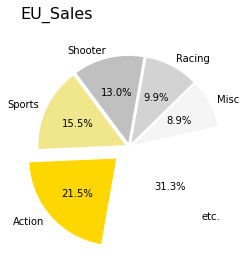

In [ ]:
ratio = [21.53, 15.50, 12.99, 9.87, 8.86, 31.27]
labels = ['Action', 'Sports', 'Shooter', 'Racing', 'Misc', 'etc.']
explode = [0.2,0.05,0.05,0.05,0.05,0.05]
colors = ['gold','khaki','silver','lightgray','whitesmoke','white']

plt.pie(ratio, labels=labels, explode=explode, colors=colors, autopct='%.1f%%', startangle=260, counterclock=False)

title_font = {
    'fontsize': 16, 
}

plt.title('EU_Sales', fontdict=title_font, loc='left', pad = 20)
plt.show()

In [ ]:
jp_arge.sort_values(ascending=False)

Genre
Role-Playing    26.64
Action          12.51
Sports          10.53
Platform        10.23
Misc             8.30
Fighting         6.89
Simulation       5.11
Puzzle           4.67
Racing           4.28
Adventure        4.09
Strategy         3.65
Shooter          3.09
Name: JP_Sales, dtype: float64

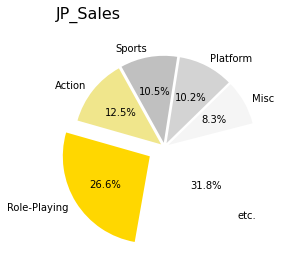

In [ ]:
ratio = [26.64, 12.51, 10.53, 10.23, 8.30, 31.78]
labels = ['Role-Playing','Action','Sports', 'Platform','Misc', 'etc.']
explode = [0.2,0.05,0.05,0.05,0.05,0.05]
colors = ['gold','khaki','silver','lightgray','whitesmoke','white']

plt.pie(ratio, labels=labels, explode=explode, colors=colors, autopct='%.1f%%', startangle=260, counterclock=False)

title_font = {
    'fontsize': 16, 
}

plt.title('JP_Sales', fontdict=title_font, loc='left', pad = 20)
plt.show()

In [ ]:
other_arge.sort_values(ascending=False)

Genre
Action          23.59
Sports          16.94
Shooter         12.97
Racing           9.86
Misc             9.37
Role-Playing     7.07
Platform         6.44
Fighting         4.60
Simulation       3.95
Adventure        2.15
Puzzle           1.63
Strategy         1.44
Name: Other_Sales, dtype: float64

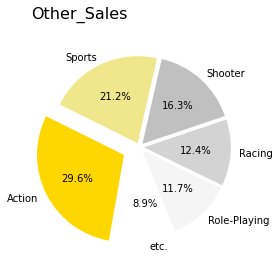

In [ ]:
ratio = [23.59, 16.94, 12.97, 9.86, 9.37, 7.07]
labels = ['Action', 'Sports', 'Shooter', 'Racing', 'Role-Playing','etc.']
explode = [0.2,0.05,0.05,0.05,0.05,0.05]
colors = ['gold','khaki','silver','lightgray','whitesmoke','white']

plt.pie(ratio, labels=labels, explode=explode, colors=colors, autopct='%.1f%%', startangle=260, counterclock=False)

title_font = {
    'fontsize': 16, 
}

plt.title('Other_Sales', fontdict=title_font, loc='left', pad = 20)
plt.show()

2. 연도별 게임의 트렌드가 있을까?

In [ ]:
df_clean_add = df_clean.copy()

df_clean_add.eval('Sum_Sales = NA_Sales+EU_Sales+JP_Sales+Other_Sales', inplace=True) 

In [ ]:
df_clean_add

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
year_trend = df_clean_add[['Year','Genre','Sum_Sales']]
year_trend

,Year,Genre,Sum_Sales
1,2008,Action,0.04
2,2009,Action,0.18
3,2010,Adventure,0.02
4,2010,Misc,0.04
5,2010,Platform,0.25
...,...,...,...
16594,2006,Platform,0.20
16595,2005,Action,0.01
16596,2015,Sports,0.79
16597,2013,Action,0.38


In [ ]:
year_trend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15476 entries, 1 to 16598
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       15476 non-null  int64  
 1   Genre      15476 non-null  object 
 2   Sum_Sales  15476 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 483.6+ KB


In [ ]:
year_trend.describe()

,Year,Sum_Sales
count,15476.000000,15476.000000
mean,2006.403851,0.536206
std,5.834873,1.570285
min,1980.000000,0.000000
25%,2003.000000,0.060000
50%,2007.000000,0.170000
75%,2010.000000,0.472500
max,2017.000000,82.740000


In [ ]:
import seaborn as sns
import matplotlib as mpl

In [ ]:
year_trend_group = year_trend.groupby(by=['Year', 'Genre']).sum().reset_index()
year_sale = year_trend_group.groupby(by=['Year'])['Sum_Sales'].transform(max) == year_trend_group['Sum_Sales']
year_sale_max = year_trend_group[year_sale].reset_index(drop=True)


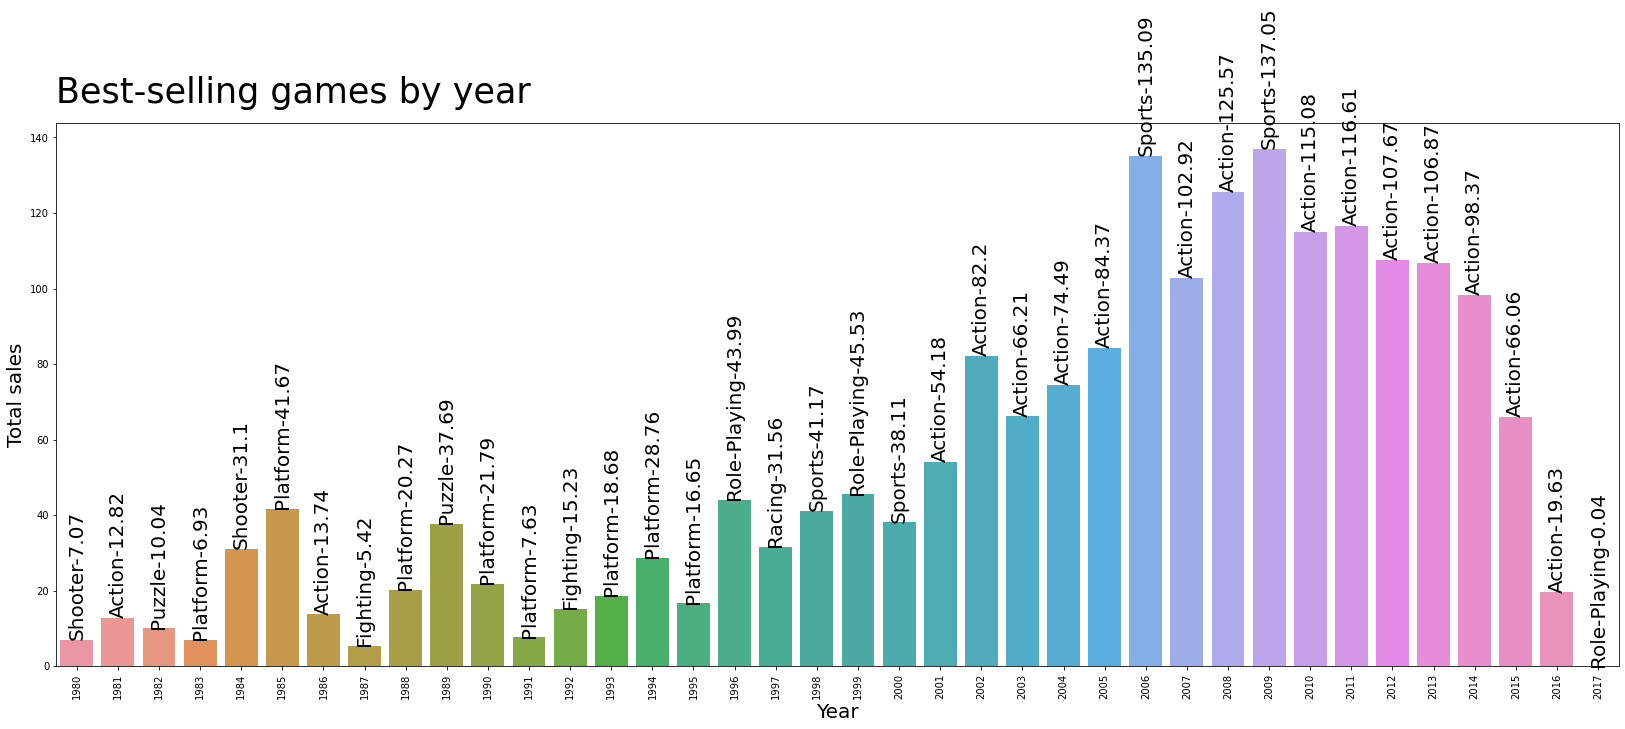

In [ ]:

genre = year_sale_max['Genre']

plt.figure(figsize=(28, 10))
g = sns.barplot(x='Year', y='Sum_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Sum_Sales']:
    g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), color='black', size=20, rotation= 90, ha="center")
    index += 1


plt.title("Best-selling games by year", fontsize=35, loc='left', pad = 20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total sales", fontsize=20)


plt.xticks(rotation=90)
plt.show()

In [ ]:
year_samax_group = year_sale_max.groupby(by=['Genre']).count()
year_samax_group.reset_index().sort_values(by=["Sum_Sales"], ascending=[False])
year_samax_group.rename({'Sum_Sales': 'Count'}, axis=1)


,Year,Count
Genre,,
Action,16,16
Fighting,2,2
Platform,8,8
Puzzle,2,2
Racing,1,1
Role-Playing,3,3
Shooter,2,2
Sports,4,4


In [ ]:
year_samax_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Action to Sports
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Year       8 non-null      int64
 1   Sum_Sales  8 non-null      int64
dtypes: int64(2)
memory usage: 192.0+ bytes


3. 출고량이 높은 게임에 대한 분석 및 시각화

In [ ]:
sales_max = df_clean_add[['Name', 'Platform','Year','Genre','Publisher','Sum_Sales']]
sales_max

,Name,Platform,Year,Genre,Publisher,Sum_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.25
...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.38


In [ ]:
sales_max_sort = sales_max.sort_values(by=["Year","Sum_Sales"], ascending=[True, False])
sales_max_sort

,Name,Platform,Year,Genre,Publisher,Sum_Sales
5724,Asteroids,2600,1980,Shooter,Atari,4.31
15013,Missile Command,2600,1980,Shooter,Atari,2.76
5939,Kaboom!,2600,1980,Misc,Activision,1.15
10122,Defender,2600,1980,Misc,Atari,1.05
14265,Boxing,2600,1980,Fighting,Activision,0.77
...,...,...,...,...,...,...
16336,This War of Mine,PS4,2016,Action,Deep Silver,0.01
16366,Sangoku Koi Senki: Omoide Gaeshi - CS Edition,PSV,2016,Adventure,Prototype,0.01
10108,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.03
5311,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.01


In [ ]:
# 연도별 출고량이 가장 높은 게임
sales_sum_max = sales_max_sort.loc[sales_max_sort.groupby(['Year'])['Sum_Sales'].idxmax()]
sales_sum_max.reset_index(drop=True, inplace=True)
sales_sum_max

,Name,Platform,Year,Genre,Publisher,Sum_Sales
0,Asteroids,2600,1980,Shooter,Atari,4.31
1,Pitfall!,2600,1981,Platform,Activision,4.50
2,Pac-Man,2600,1982,Puzzle,Atari,7.81
3,Baseball,NES,1983,Sports,Nintendo,3.20
4,Duck Hunt,NES,1984,Shooter,Nintendo,28.31
5,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
6,The Legend of Zelda,NES,1986,Action,Nintendo,6.50
7,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,4.38
8,Super Mario Bros. 3,NES,1988,Platform,Nintendo,17.28
9,Tetris,GB,1989,Puzzle,Nintendo,30.26


In [ ]:
# 연도별 출고량이 가장 높은 게임의 플랫폼
sales_count_platform = sales_sum_max['Platform'].value_counts(ascending=False)

In [ ]:
# 연도별 출고량이 가장 높은 게임의 장르
sales_count_genre = sales_sum_max['Genre'].value_counts(ascending=False)

In [ ]:
# 연도별 출고량이 가장 높은 게임 제작사
sales_count_publisher = sales_sum_max['Publisher'].value_counts()
sales_count_publisher

Nintendo                       21
Activision                      4
Take-Two Interactive            4
Sony Computer Entertainment     3
Atari                           2
Electronic Arts                 1
Microsoft Game Studios          1
Ubisoft                         1
Sega                            1
Name: Publisher, dtype: int64

In [ ]:
# 연도별 출고량이 가장 높은 게임의 장르, 제작사, 플랫폼을 데이터프레임으로 변경하고 시각화

In [ ]:
sales_count_platform_df = sales_count_platform.to_frame().reset_index()
sales_count_platform_df.columns = ['Platform','Count_Sum']

In [ ]:
sales_count_genre_df = sales_count_genre.to_frame().reset_index()
sales_count_genre_df.columns = ['Genre','Count_Sum']

In [ ]:
sales_count_publisher_df = sales_count_publisher.to_frame().reset_index()
sales_count_publisher_df.columns = ['Publisher','Count_Sum']
sales_count_publisher_df

,Publisher,Count_Sum
0,Nintendo,21
1,Activision,4
2,Take-Two Interactive,4
3,Sony Computer Entertainment,3
4,Atari,2
5,Electronic Arts,1
6,Microsoft Game Studios,1
7,Ubisoft,1
8,Sega,1


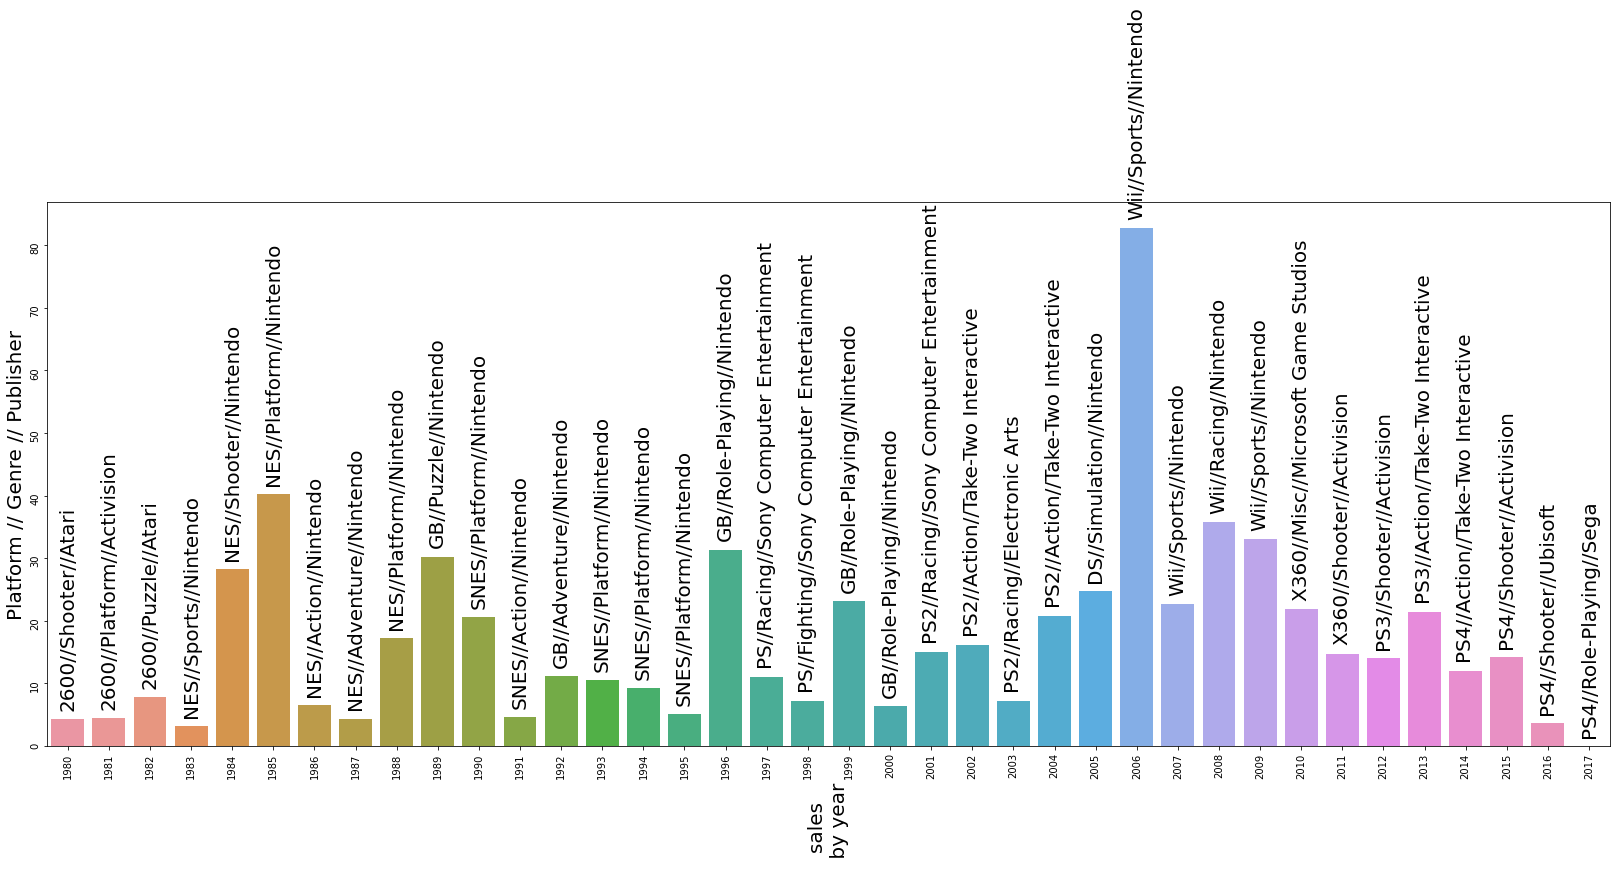

In [ ]:
sales_publisher = sales_sum_max['Publisher']
sales_platform = sales_sum_max['Platform']
sales_genre = sales_sum_max['Genre']

plt.figure(figsize=(28, 10))
g = sns.barplot(x='Year', y='Sum_Sales', data=sales_sum_max)
index = 0
for value in sales_sum_max['Sum_Sales']:
    g.text(index, value + 2, str(sales_platform[index] + '//' + sales_genre[index]+ '//' + sales_publisher[index] ), color='black', size=20, rotation= 90, ha="center")
    index += 1



plt.xlabel("sales \n by year",fontsize=20, rotation=90)
plt.ylabel("Platform // Genre // Publisher", fontsize=20)

plt.yticks(rotation=90)
plt.xticks(rotation=90)
plt.show()


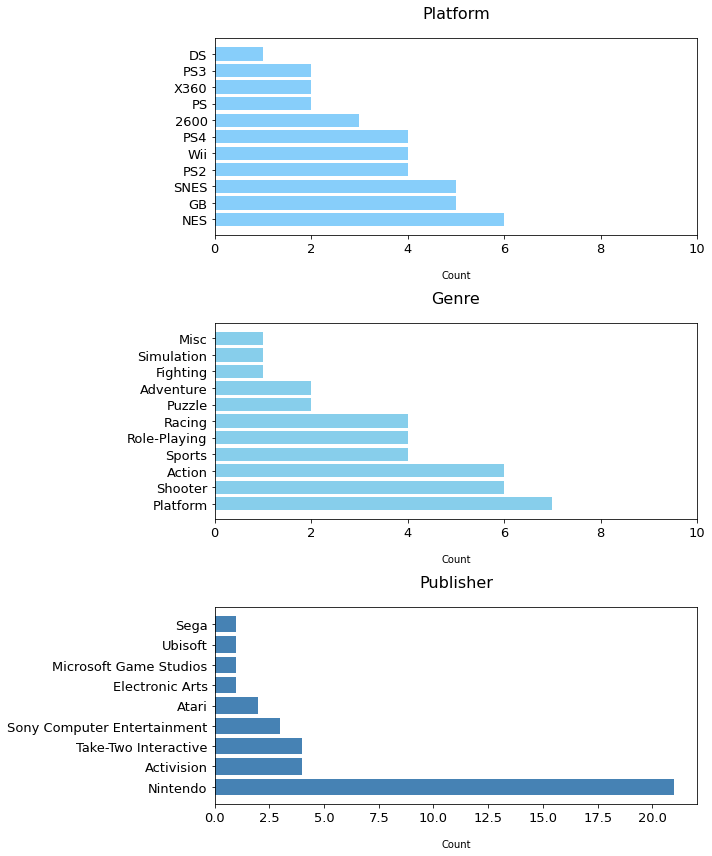

In [ ]:
sa_x = sales_count_platform_df
sa_y = sales_count_genre_df
sa_z = sales_count_publisher_df

plt.figure(figsize=(10,12))

plt.subplot(3,1,1)
plt.barh(sa_x['Platform'], sa_x['Count_Sum'], color='lightskyblue')
plt.xlim([0, 10]) 
plt.title('Platform', fontsize=16, pad=20)
plt.xlabel('Count', labelpad=15)
plt.ylabel('')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.subplot(3,1,2)
plt.barh(sa_y['Genre'], sa_y['Count_Sum'], color ='skyblue')
plt.xlim([0, 10]) 
plt.title('Genre', fontsize=16, pad=20)
plt.xlabel('Count', labelpad=15)
plt.ylabel('')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.subplot(3,1,3)
plt.barh(sa_z['Publisher'], sa_z['Count_Sum'], color = 'steelblue')
plt.title('Publisher', fontsize=16, pad=20)
plt.xlabel('Count', labelpad=15)
plt.ylabel('')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.tight_layout()
plt.show()

4. 그 외

In [ ]:
# 플랫폼별 장르 판매량
etc = df_clean_add[['Platform','Genre','Sum_Sales']]
etc

,Platform,Genre,Sum_Sales
1,DS,Action,0.04
2,Wii,Action,0.18
3,PSP,Adventure,0.02
4,DS,Misc,0.04
5,PS3,Platform,0.25
...,...,...,...
16594,GC,Platform,0.20
16595,PSP,Action,0.01
16596,PS3,Sports,0.79
16597,PSV,Action,0.38


In [ ]:
etc_pg_group = etc.groupby(['Genre','Platform']).sum()
etc_pg_group.reset_index()

,Genre,Platform,Sum_Sales
0,Action,2600,24.34
1,Action,3DS,56.10
2,Action,DC,1.26
3,Action,DS,106.62
4,Action,GB,7.93
...,...,...,...
287,Strategy,Wii,4.92
288,Strategy,WiiU,1.24
289,Strategy,X360,9.24
290,Strategy,XB,2.55


In [ ]:
ge_action = etc_pg_group.groupby("Genre").get_group("Action").sort_values(by="Sum_Sales", ascending = False)

ge_action_five = ge_action.head(5)
ge_action_five.reset_index()

,Genre,Platform,Sum_Sales
0,Action,PS3,288.11
1,Action,PS2,264.49
2,Action,X360,210.60
3,Action,PS,117.19
4,Action,DS,106.62


In [ ]:
ge_adventure = etc_pg_group.groupby("Genre").get_group("Adventure").sort_values(by="Sum_Sales", ascending = False)

ge_adventure_five = ge_adventure.head(5).reset_index()
ge_adventure_five

,Genre,Platform,Sum_Sales
0,Adventure,DS,44.75
1,Adventure,PS3,22.85
2,Adventure,PS2,20.14
3,Adventure,Wii,17.70
4,Adventure,GB,17.15


In [ ]:
ge_misc = etc_pg_group.groupby("Genre").get_group("Misc").sort_values(by="Sum_Sales", ascending = False)

ge_misc_five = ge_misc.head(5).reset_index()
ge_misc_five

,Genre,Platform,Sum_Sales
0,Misc,Wii,201.04
1,Misc,DS,132.40
2,Misc,PS2,93.19
3,Misc,X360,86.10
4,Misc,PS,44.33


In [ ]:
ge_platform = etc_pg_group.groupby("Genre").get_group("Platform").sort_values(by="Sum_Sales", ascending = False)

ge_platform_five = ge_platform.head(5).reset_index()
ge_platform_five

,Genre,Platform,Sum_Sales
0,Platform,Wii,86.26
1,Platform,NES,85.63
2,Platform,DS,73.30
3,Platform,GBA,71.68
4,Platform,SNES,65.61


In [ ]:
ge_sports = etc_pg_group.groupby("Genre").get_group("Sports").sort_values(by="Sum_Sales", ascending = False)

ge_sports_five = ge_sports.head(5).reset_index()
ge_sports_five

,Genre,Platform,Sum_Sales
0,Sports,Wii,280.46
1,Sports,PS2,245.26
2,Sports,PS3,128.81
3,Sports,X360,128.16
4,Sports,PS,117.89


In [ ]:
ge_simulation = etc_pg_group.groupby("Genre").get_group("Simulation").sort_values(by="Sum_Sales", ascending = False)

ge_simulation_five = ge_simulation.head(5).reset_index()
ge_simulation_five

,Genre,Platform,Sum_Sales
0,Simulation,DS,126.19
1,Simulation,PC,51.04
2,Simulation,PS2,40.41
3,Simulation,Wii,34.90
4,Simulation,3DS,26.62


In [ ]:
ge_role = etc_pg_group.groupby("Genre").get_group("Role-Playing").sort_values(by="Sum_Sales", ascending = False)

ge_role_five = ge_role.head(5).reset_index()
ge_role_five

,Genre,Platform,Sum_Sales
0,Role-Playing,DS,125.02
1,Role-Playing,PS2,84.22
2,Role-Playing,GB,72.83
3,Role-Playing,X360,69.06
4,Role-Playing,PS,67.91


In [ ]:
ge_puzzle = etc_pg_group.groupby("Genre").get_group("Puzzle").sort_values(by="Sum_Sales", ascending = False)

ge_puzzle_five = ge_puzzle.head(5).reset_index()
ge_puzzle_five

,Genre,Platform,Sum_Sales
0,Puzzle,DS,80.73
1,Puzzle,GB,47.47
2,Puzzle,NES,20.93
3,Puzzle,Wii,15.42
4,Puzzle,2600,13.67


In [ ]:
ge_strategy = etc_pg_group.groupby("Genre").get_group("Strategy").sort_values(by="Sum_Sales", ascending = False)

ge_strategy_five = ge_strategy.head(5).reset_index()
ge_strategy_five

,Genre,Platform,Sum_Sales
0,Strategy,PC,43.06
1,Strategy,PS,20.92
2,Strategy,DS,14.23
3,Strategy,PS2,13.11
4,Strategy,N64,10.34


In [ ]:
ge_fighting = etc_pg_group.groupby("Genre").get_group("Fighting").sort_values(by="Sum_Sales", ascending = False)

ge_fighting_five = ge_fighting.head(5).reset_index()
ge_fighting_five

,Genre,Platform,Sum_Sales
0,Fighting,PS2,83.84
1,Fighting,PS,67.48
2,Fighting,PS3,49.52
3,Fighting,X360,37.00
4,Fighting,SNES,26.94


In [ ]:
ge_racing = etc_pg_group.groupby("Genre").get_group("Racing").sort_values(by="Sum_Sales", ascending = False)

ge_racing_five = ge_racing.head(5).reset_index()
ge_racing_five

,Genre,Platform,Sum_Sales
0,Racing,PS2,149.75
1,Racing,PS,95.28
2,Racing,PS3,68.88
3,Racing,X360,62.81
4,Racing,Wii,61.03


In [ ]:
ge_shooter = etc_pg_group.groupby("Genre").get_group("Shooter").sort_values(by="Sum_Sales", ascending = False)

ge_shooter_five = ge_shooter.head(5).reset_index()
ge_shooter_five

,Genre,Platform,Sum_Sales
0,Shooter,X360,254.11
1,Shooter,PS3,192.31
2,Shooter,PS2,107.03
3,Shooter,PS4,67.20
4,Shooter,XB,59.54


In [ ]:
etc['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Racing',
       'Shooter'], dtype=object)

In [ ]:
# 플랫폼별 판매량

etc2 = df_clean_add[['Platform','Sum_Sales']]
etc2

,Platform,Sum_Sales
1,DS,0.04
2,Wii,0.18
3,PSP,0.02
4,DS,0.04
5,PS3,0.25
...,...,...
16594,GC,0.20
16595,PSP,0.01
16596,PS3,0.79
16597,PSV,0.38


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text major ticklabel objects>)

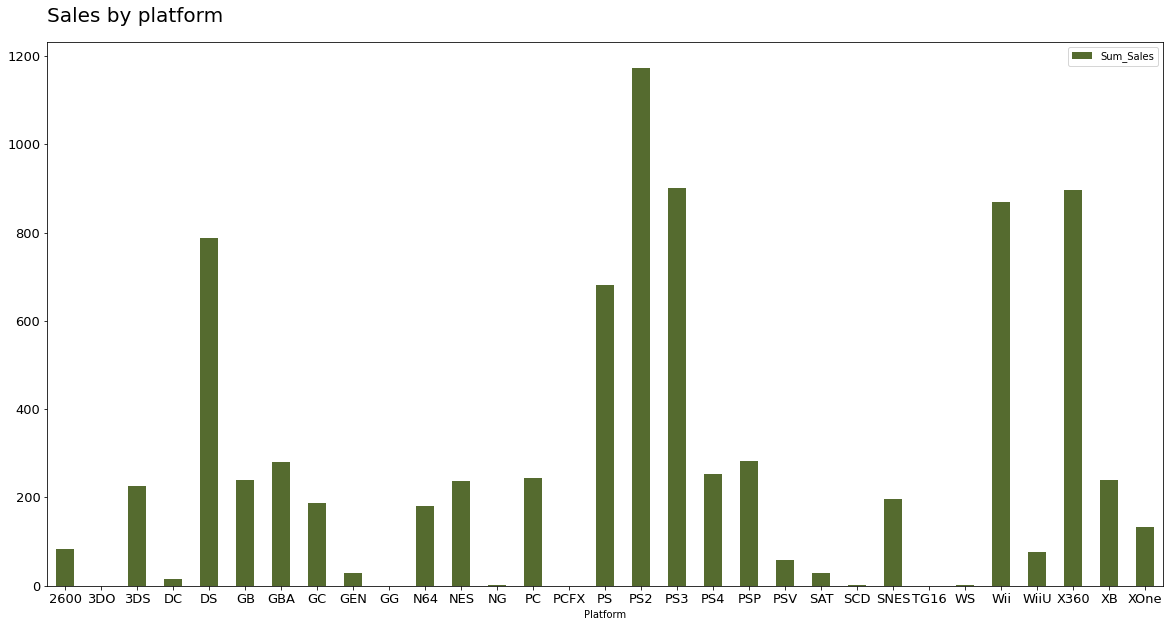

In [ ]:
plat_sum = etc2.groupby('Platform').sum()
plat_sum.plot.bar(rot =0, figsize =(20,10), color = 'darkolivegreen')

plt.title('Sales by platform', loc='left',fontsize=20, pad=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


In [ ]:
# 게임별 판매량 
etc3 = df_clean_add[['Name','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Sum_Sales']]
etc3.head()

,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
1,Candace Kane's Candy Factory,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [ ]:
etc3_group = etc3.groupby(['Name','Genre','Publisher']).sum()
etc3_group_graph = etc3_group.reset_index().sort_values(by=["Sum_Sales"], ascending=[False]).reset_index(drop=True).head()
etc3_group_graph


,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
0,Wii Sports,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,Platform,Nintendo,32.48,4.88,6.96,0.99,45.31
2,Grand Theft Auto V,Action,Take-Two Interactive,13.83,17.73,1.33,6.65,39.54
3,Tetris,Puzzle,Nintendo,26.17,2.95,6.03,0.69,35.84
4,Mario Kart Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83


In [ ]:
etc3_group_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5 non-null      object 
 1   Genre        5 non-null      object 
 2   Publisher    5 non-null      object 
 3   NA_Sales     5 non-null      float64
 4   EU_Sales     5 non-null      float64
 5   JP_Sales     5 non-null      float64
 6   Other_Sales  5 non-null      float64
 7   Sum_Sales    5 non-null      float64
dtypes: float64(5), object(3)
memory usage: 448.0+ bytes


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text major ticklabel objects>)

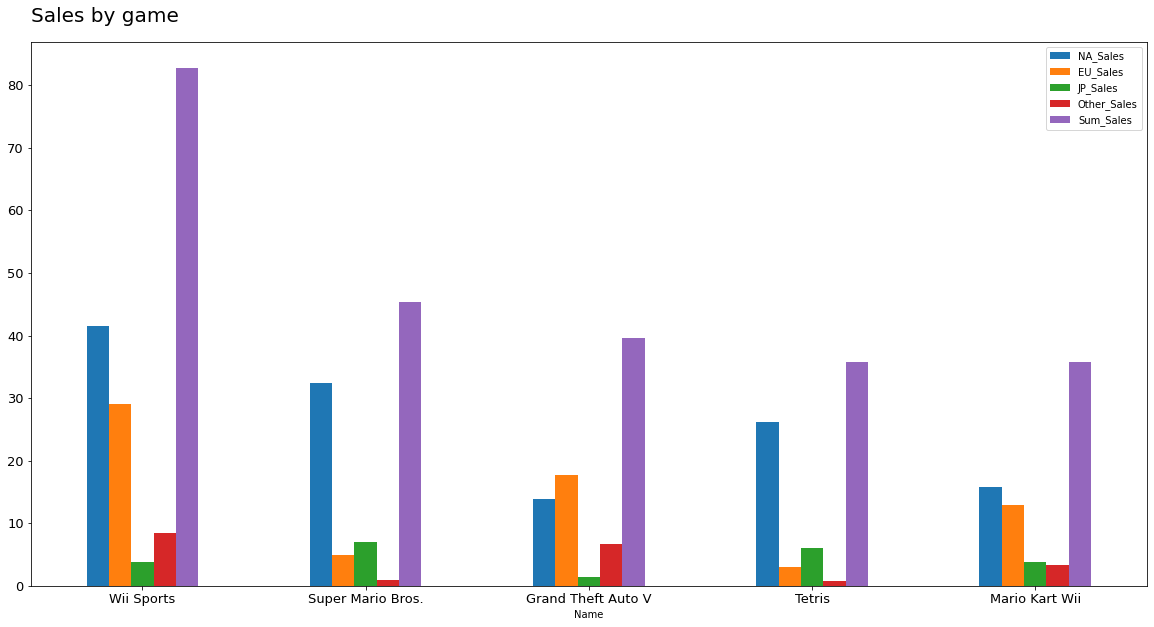

In [ ]:
etc3_group_graph.index=etc3_group_graph['Name']
etc3_group_graph.plot.bar(rot =0, figsize =(20,10))

plt.title('Sales by game', loc='left',fontsize=20, pad=20)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


Text(0.5, 1.0, 'Game')

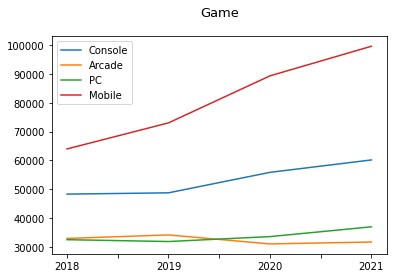

In [ ]:
etc4 = pd.DataFrame([[48269,32877,32443,63965],[48718,34093,31801,73013],[55826,30973,33512,89348],[60146,31632,36910,99634]],
                    index=['2018','2019','2020','2021'],
                    columns=['Console','Arcade','PC','Mobile'])

etc4.plot()
plt.title('Game',fontsize=13, pad=20)

In [ ]:
etc4

,Console,Arcade,PC,Mobile
2018,48269,32877,32443,63965
2019,48718,34093,31801,73013
2020,55826,30973,33512,89348
2021,60146,31632,36910,99634


In [ ]:
etc4_t = etc4.transpose()
etc4_t

,2018,2019,2020,2021
Console,48269,48718,55826,60146
Arcade,32877,34093,30973,31632
PC,32443,31801,33512,36910
Mobile,63965,73013,89348,99634


In [ ]:
etc4_global = pd.DataFrame([[177553,187625,209658,228322]],
                    index=['Global'],
                    columns=['2018','2019','2020','2021'])
etc4_global.transpose()

,Global
2018,177553
2019,187625
2020,209658
2021,228322


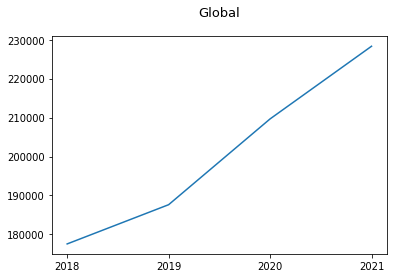

In [ ]:
plt.plot(['2018','2019','2020','2021'],[177553,187625,209658,228322])
plt.title('Global',fontsize=13, pad=20)
plt.show()

In [ ]:
etc5 = pd.DataFrame([[932, 367, 504]],
                    columns=['Mobile', 'PC', 'Console'])
etc5


,Mobile,PC,Console
0,932,367,504


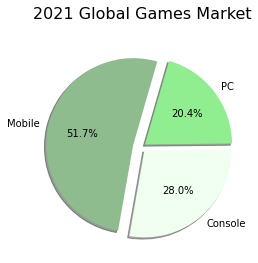

In [ ]:
ratio = [932, 367, 504]
labels = ['Mobile', 'PC', 'Console']
explode = [0.1,0.05,0.05]
colors = ['darkseagreen','lightgreen','honeydew']

plt.pie(ratio, labels=labels, explode=explode, colors=colors, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)

title_font = {
    'fontsize': 16, 
}

plt.title('2021 Global Games Market', fontdict=title_font, loc='left', pad = 20)
plt.show()